In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
label_table = np.loadtxt("CosmoAstroSeed_IllustrisTNG_L25n256_LH.txt", skiprows=1, usecols=range(1, 7))

d = np.load("../wgplus_data.npz")
# dictionary
axes = ['x', 'y', 'z']
r = d['r']
wgplusses = {axis: d[axis] for axis in axes}
d = np.load("../wgg_data.npz")
wgg = d['wgg']

# Example: Access the 250th row, 4th column of the 'x' axis
print(label_table.shape)
print(wgplusses['x'].shape)
corr_data = np.array(wgplusses['x'])
corr_data = np.append(corr_data, np.append(wgplusses['y'],wgplusses['z'],axis=0),axis=0)
corr_labels = np.repeat(label_table, 3, axis=0)
print(corr_data.shape, corr_labels.shape)

(1000, 6)
(1000, 6)
(3000, 6) (3000, 6)


In [48]:
# Get the sorted indices based on the first column of corr_labels
sorted_indices = np.argsort(corr_labels[:, 4])

# Sort corr_data and corr_labels using the sorted indices
sorted_corr_data = wgg[sorted_indices] #corr_data[sorted_indices]
sorted_corr_labels = corr_labels[sorted_indices]

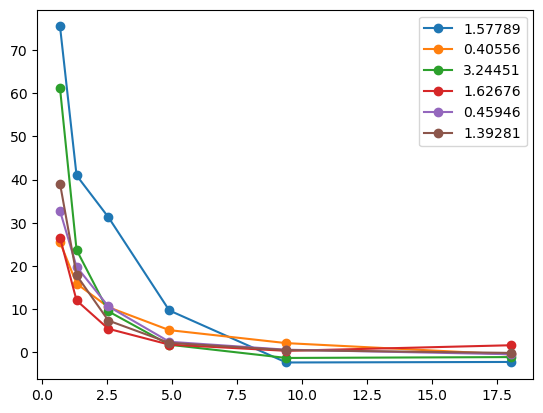

In [49]:
r = d['r']
for i in np.linspace(26,850,6,dtype='int'):
    plt.plot(r, sorted_corr_data[i],'o-', label = f'{sorted_corr_labels[i,2]}')
plt.legend()